In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
df = pd.read_csv("carprices.csv")
df

,CarModel,Mileage,SellPriceinDollars,Ageinyrs
0,BMW X5,69000,18000,6
1,BMW X5,35000,34000,3
2,BMW X5,57000,26100,5
3,BMW X5,22500,40000,2
4,BMW X5,46000,31500,4
5,Audi A5,59000,29400,5
6,Audi A5,52000,32000,5
7,Audi A5,72000,19300,6
8,Audi A5,91000,12000,8
9,Mercedez Benz C class,67000,22000,6


**Plot data points on a scatter plot chart**

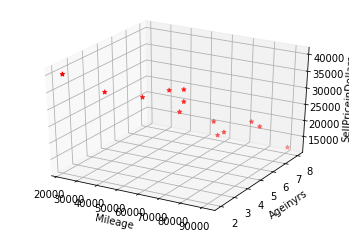

In [3]:
fig=plt.figure()
my3dplot=fig.add_subplot(111, projection='3d')
my3dplot.scatter(df.Mileage,df.Ageinyrs,df.SellPriceinDollars, c='r', marker='*')
my3dplot.set_xlabel('Mileage')
my3dplot.set_ylabel('Ageinyrs')
my3dplot.set_zlabel('SellPriceinDollars')
plt.show()

**Using pandas to create dummy variables**

In [4]:
dummies = pd.get_dummies(df.CarModel)
dummies

,Audi A5,BMW X5,Mercedez Benz C class
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0
5,1,0,0
6,1,0,0
7,1,0,0
8,1,0,0
9,0,0,1


In [5]:
merged = pd.concat([df,dummies],axis='columns')
merged

,CarModel,Mileage,SellPriceinDollars,Ageinyrs,Audi A5,BMW X5,Mercedez Benz C class
0,BMW X5,69000,18000,6,0,1,0
1,BMW X5,35000,34000,3,0,1,0
2,BMW X5,57000,26100,5,0,1,0
3,BMW X5,22500,40000,2,0,1,0
4,BMW X5,46000,31500,4,0,1,0
5,Audi A5,59000,29400,5,1,0,0
6,Audi A5,52000,32000,5,1,0,0
7,Audi A5,72000,19300,6,1,0,0
8,Audi A5,91000,12000,8,1,0,0
9,Mercedez Benz C class,67000,22000,6,0,0,1


In [6]:
final = merged.drop(['CarModel'], axis='columns')
final

,Mileage,SellPriceinDollars,Ageinyrs,Audi A5,BMW X5,Mercedez Benz C class
0,69000,18000,6,0,1,0
1,35000,34000,3,0,1,0
2,57000,26100,5,0,1,0
3,22500,40000,2,0,1,0
4,46000,31500,4,0,1,0
5,59000,29400,5,1,0,0
6,52000,32000,5,1,0,0
7,72000,19300,6,1,0,0
8,91000,12000,8,1,0,0
9,67000,22000,6,0,0,1


**Dummy Variable Trap**

When we can derive one variable from other variables, they are known to be multi-colinear. Here if we know values of Audi A5 and BMW X5 then we can easily infer value of Mercedez Benz C class, i.e. Audi A5=0 and BMW X5=0. There for these CarModel variables are called to be multi-colinear. In this situation linear regression won't work as expected. Hence you need to drop one column.

**NOTE: sklearn library takes care of dummy variable trap hence even if we don't drop one of the state columns it is going to work, however we should make a habit of taking care of dummy variable trap ourselves just in case library that we are using is not handling this for us.**

In [7]:
final = final.drop(['Mercedez Benz C class'], axis='columns')
final

,Mileage,SellPriceinDollars,Ageinyrs,Audi A5,BMW X5
0,69000,18000,6,0,1
1,35000,34000,3,0,1
2,57000,26100,5,0,1
3,22500,40000,2,0,1
4,46000,31500,4,0,1
5,59000,29400,5,1,0
6,52000,32000,5,1,0
7,72000,19300,6,1,0
8,91000,12000,8,1,0
9,67000,22000,6,0,0


In [8]:
X = final.drop('SellPriceinDollars', axis='columns')
X

,Mileage,Ageinyrs,Audi A5,BMW X5
0,69000,6,0,1
1,35000,3,0,1
2,57000,5,0,1
3,22500,2,0,1
4,46000,4,0,1
5,59000,5,1,0
6,52000,5,1,0
7,72000,6,1,0
8,91000,8,1,0
9,67000,6,0,0


In [9]:
y = final.SellPriceinDollars

In [10]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [11]:
model.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [12]:
model.predict(X) 

array([18705.2723644 , 35286.78445645, 24479.19112468, 41245.76426391,
       29882.98779056, 28023.6135243 , 30614.46818502, 21879.57266964,
       12182.34562104, 26183.72387884, 18929.31674102, 20409.80511857,
       30477.15426156])

**1) Predicting price of a mercedez benz that is 4 yr old with mileage 45000 using Pandas Dummy Variables.**

In [13]:
model.predict([[45000,4,0,0]])

array([36991.31721061])

**2) Predict price of a BMW X5 that is 7 yr old with mileage 86000 using Pandas Dummy Variables.**

In [14]:
model.predict([[86000,7,0,1]])

array([11080.74313219])

**Using sklearn OneHotEncoder**

In [15]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [16]:
dfle = df
dfle.CarModel = le.fit_transform(dfle.CarModel)
dfle

,CarModel,Mileage,SellPriceinDollars,Ageinyrs
0,1,69000,18000,6
1,1,35000,34000,3
2,1,57000,26100,5
3,1,22500,40000,2
4,1,46000,31500,4
5,0,59000,29400,5
6,0,52000,32000,5
7,0,72000,19300,6
8,0,91000,12000,8
9,2,67000,22000,6


In [17]:
X = dfle[['CarModel','Mileage','Ageinyrs']].values

In [18]:
X

array([[    1, 69000,     6],
       [    1, 35000,     3],
       [    1, 57000,     5],
       [    1, 22500,     2],
       [    1, 46000,     4],
       [    0, 59000,     5],
       [    0, 52000,     5],
       [    0, 72000,     6],
       [    0, 91000,     8],
       [    2, 67000,     6],
       [    2, 83000,     7],
       [    2, 79000,     7],
       [    2, 59000,     5]], dtype=int64)

In [19]:
y = dfle.SellPriceinDollars.values
y

array([18000, 34000, 26100, 40000, 31500, 29400, 32000, 19300, 12000,
       22000, 20000, 21000, 33000], dtype=int64)

In [20]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
ct = ColumnTransformer([('CarModel', OneHotEncoder(), [0])], remainder = 'passthrough')

In [21]:
X = ct.fit_transform(X)
X

array([[0.00e+00, 1.00e+00, 0.00e+00, 6.90e+04, 6.00e+00],
       [0.00e+00, 1.00e+00, 0.00e+00, 3.50e+04, 3.00e+00],
       [0.00e+00, 1.00e+00, 0.00e+00, 5.70e+04, 5.00e+00],
       [0.00e+00, 1.00e+00, 0.00e+00, 2.25e+04, 2.00e+00],
       [0.00e+00, 1.00e+00, 0.00e+00, 4.60e+04, 4.00e+00],
       [1.00e+00, 0.00e+00, 0.00e+00, 5.90e+04, 5.00e+00],
       [1.00e+00, 0.00e+00, 0.00e+00, 5.20e+04, 5.00e+00],
       [1.00e+00, 0.00e+00, 0.00e+00, 7.20e+04, 6.00e+00],
       [1.00e+00, 0.00e+00, 0.00e+00, 9.10e+04, 8.00e+00],
       [0.00e+00, 0.00e+00, 1.00e+00, 6.70e+04, 6.00e+00],
       [0.00e+00, 0.00e+00, 1.00e+00, 8.30e+04, 7.00e+00],
       [0.00e+00, 0.00e+00, 1.00e+00, 7.90e+04, 7.00e+00],
       [0.00e+00, 0.00e+00, 1.00e+00, 5.90e+04, 5.00e+00]])

In [22]:
X = X[:,1:]

In [23]:
X

array([[1.00e+00, 0.00e+00, 6.90e+04, 6.00e+00],
       [1.00e+00, 0.00e+00, 3.50e+04, 3.00e+00],
       [1.00e+00, 0.00e+00, 5.70e+04, 5.00e+00],
       [1.00e+00, 0.00e+00, 2.25e+04, 2.00e+00],
       [1.00e+00, 0.00e+00, 4.60e+04, 4.00e+00],
       [0.00e+00, 0.00e+00, 5.90e+04, 5.00e+00],
       [0.00e+00, 0.00e+00, 5.20e+04, 5.00e+00],
       [0.00e+00, 0.00e+00, 7.20e+04, 6.00e+00],
       [0.00e+00, 0.00e+00, 9.10e+04, 8.00e+00],
       [0.00e+00, 1.00e+00, 6.70e+04, 6.00e+00],
       [0.00e+00, 1.00e+00, 8.30e+04, 7.00e+00],
       [0.00e+00, 1.00e+00, 7.90e+04, 7.00e+00],
       [0.00e+00, 1.00e+00, 5.90e+04, 5.00e+00]])

In [24]:
model.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

**3) Predict price of a mercedez benz that is 4 yr old with mileage 45000 sklearn OneHotEncoder.**

In [25]:
model.predict([[0,1,45000,4]])

array([36991.31721062])

**4) Predict price of a BMW X5 that is 7 yr old with mileage 86000 using sklearn OneHotEncoder.**

In [26]:
model.predict([[1,0,86000,7]])

array([11080.74313219])

**5)The score (accuracy) of your model**

In [27]:
model.score(X,y)

0.9417050937281083